In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import pywt
import os
import tqdm 
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [97]:
# make label
# 0.1 초에 2560개 샘플 (10초 간격) -> 즉 10초에 2560 1분: 15360
Path = "./Merged Raw Data/Full_pro_raw"
bearing_list = os.listdir(Path)

Y = pd.DataFrame(np.array([5730,339,1610,1460,7570,7530,1390,3090,1290,580,820])*256).T
Y.columns  = bearing_list
Y.to_csv("RUL.csv",index=False)
Y_RUL = Y
Y_RUL



,Bearing1_3.csv,Bearing1_4.csv,Bearing1_5.csv,Bearing1_6.csv,Bearing1_7.csv,Bearing2_3.csv,Bearing2_4.csv,Bearing2_5.csv,Bearing2_6.csv,Bearing2_7.csv,Bearing3_3.csv
0,1466880,86784,412160,373760,1937920,1927680,355840,791040,330240,148480,209920


In [95]:
#TEST LEN
Path2 = "./Merged Raw Data/pro_test_raw"
bearing_list = os.listdir(Path2)

test_len = []
for name in bearing_list:
    data = pd.read_csv(Path2 + "/"+name)
    #print(nul)
    #print(nul2)
    test_len.append(len(data))


test_len = pd.DataFrame(test_len).T
test_len.columns  = bearing_list
test_len

,Bearing1_3.csv,Bearing1_4.csv,Bearing1_5.csv,Bearing1_6.csv,Bearing1_7.csv,Bearing2_3.csv,Bearing2_4.csv,Bearing2_5.csv,Bearing2_6.csv,Bearing2_7.csv,Bearing3_3.csv
0,4611318,2914701,5890818,5890818,3843618,3075918,1566108,5123118,1463748,440148,900768


In [99]:
# HOriOVER 20 이 나오는 경우

Path = "./Merged Raw Data/Full_pro_raw"
bearing_list = os.listdir(Path)

over_len = []
for name in bearing_list:
    data = pd.read_csv(Path + "/"+name)
    
    
    idx = data[(data['Horiz']>20)].index[0]
    #    
    #nul = data[data['Horiz'].isnull()]
    #nul2 = data[data['Horiz'].isnull()]
    


    #print(nul)
    #print(nul2)
    over_len.append(idx)

# OVER 20
over = pd.DataFrame(over_len).T
over.columns  = bearing_list
over

,Bearing1_3.csv,Bearing1_4.csv,Bearing1_5.csv,Bearing1_6.csv,Bearing1_7.csv,Bearing2_3.csv,Bearing2_4.csv,Bearing2_5.csv,Bearing2_6.csv,Bearing2_7.csv,Bearing3_3.csv
0,5949893,2941670,6302817,6264432,5708311,4979814,1921809,5913849,1793859,579191,1110606


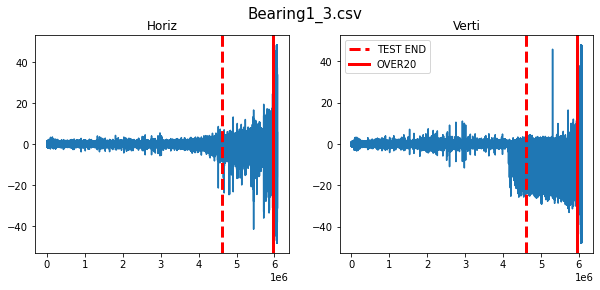

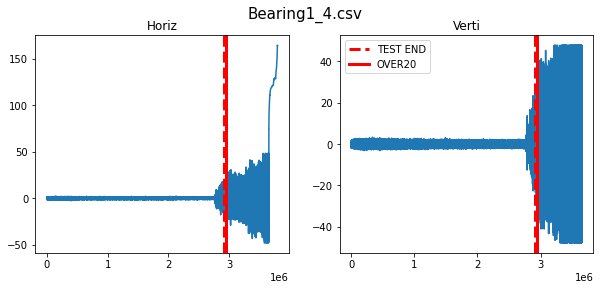

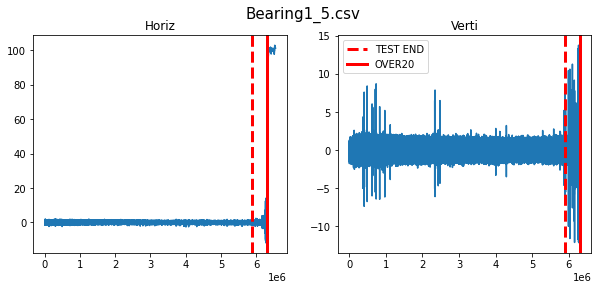

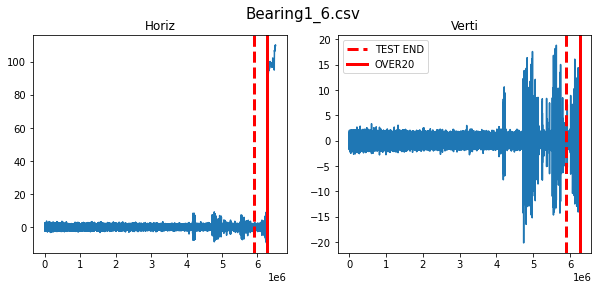

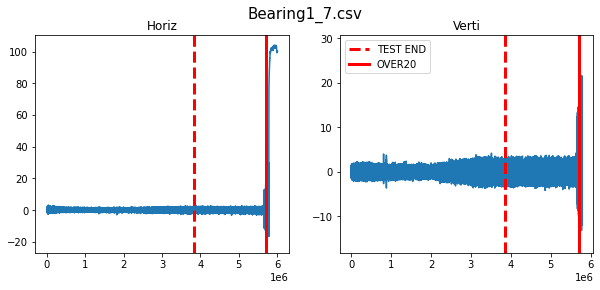

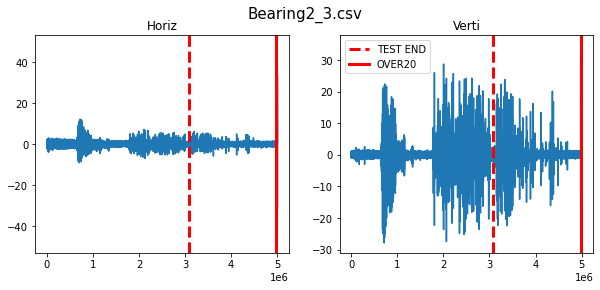

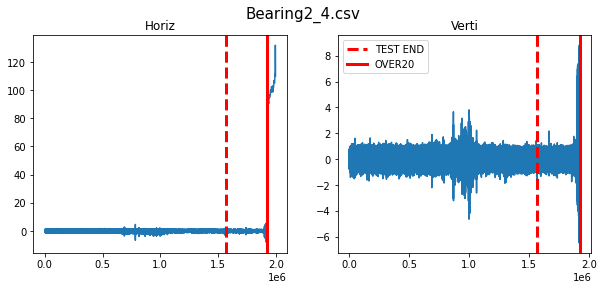

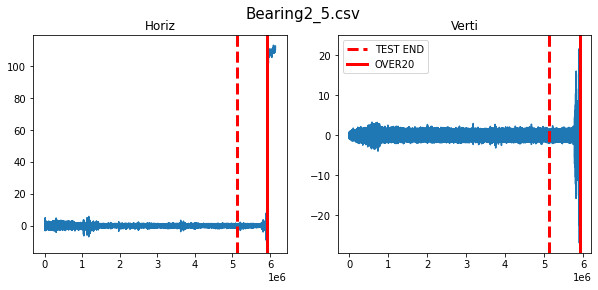

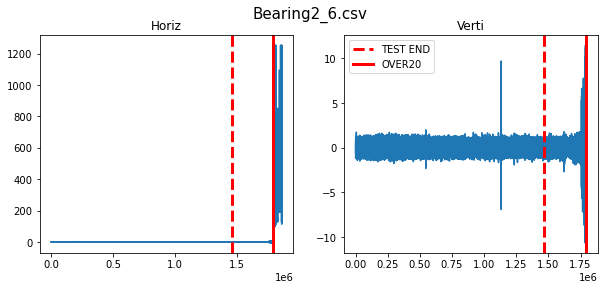

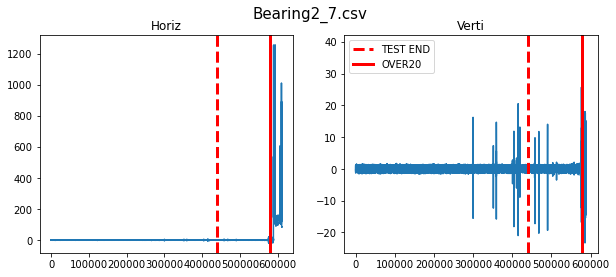

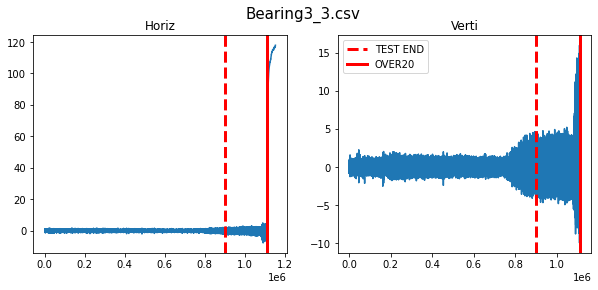

In [103]:
Path = "./Merged Raw Data/Full_pro_raw"
bearing_list = os.listdir(Path)

for name in bearing_list:
    data = pd.read_csv(Path + "/"+name)
    hori = data['Horiz']
    verti = data['Vert']
    
    fig, ax = plt.subplots(1, 2)
    plt.rcParams["figure.figsize"] = (10,4)
    
    ax[0].plot(hori)
    ax[1].plot(verti)

    ax[0].set_title("Horiz")
    ax[1].set_title("Verti")
    
    label = test_len[name]
    over_line  = over[name]
            
    ax[0].axvline(x=label[0], color='r', linestyle='--',label='TEST END', linewidth=1)
    ax[1].axvline(x=label[0], color='r', linestyle='--',label='TEST END', linewidth=1)
    
    ax[0].axvline(x=over_line[0], color='r',label='OVER20', linewidth=1)
    ax[1].axvline(x=over_line[0], color='r',label='OVER20', linewidth=1)

    
    plt.suptitle(name,fontsize=15)
    plt.savefig("./Merged Raw Data/"+'plot/'+name[:-4] +'.png')
    plt.legend()
    plt.show()


No handles with labels found to put in legend.


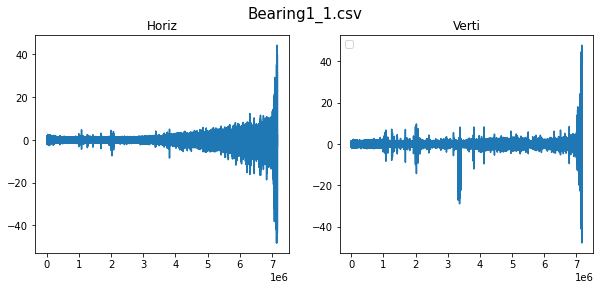

No handles with labels found to put in legend.


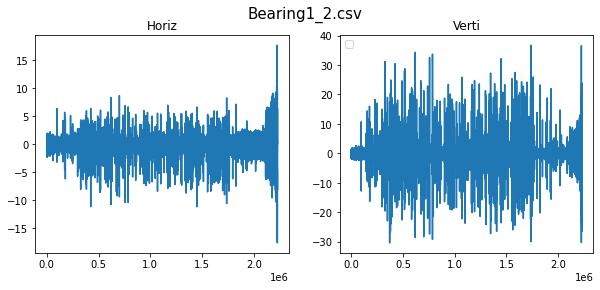

No handles with labels found to put in legend.


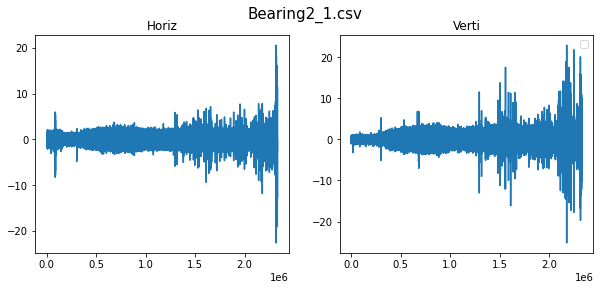

No handles with labels found to put in legend.


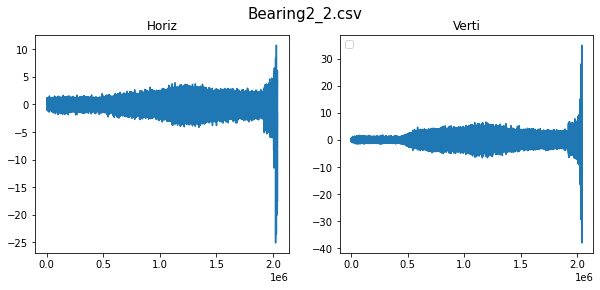

No handles with labels found to put in legend.


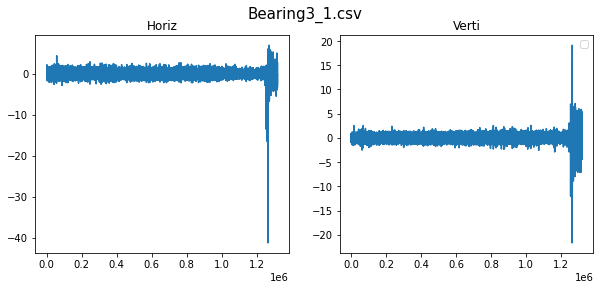

No handles with labels found to put in legend.


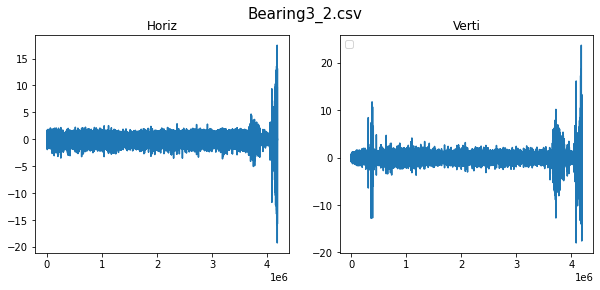

In [105]:
Path = "./Merged Raw Data/pro_learning_raw"
bearing_list = os.listdir(Path)

for name in bearing_list:
    data = pd.read_csv(Path + "/"+name)
    hori = data['Horiz']
    verti = data['Vert']
    
    fig, ax = plt.subplots(1, 2)
    plt.rcParams["figure.figsize"] = (10,4)
    
    ax[0].plot(hori)
    ax[1].plot(verti)

    ax[0].set_title("Horiz")
    ax[1].set_title("Verti")
    
    #label = test_len[name]
    #over_line  = over[name]
            
    #ax[0].axvline(x=label[0], color='r', linestyle='--',label='TEST END', linewidth=1)
    #ax[1].axvline(x=label[0], color='r', linestyle='--',label='TEST END', linewidth=1)
    
    #ax[0].axvline(x=over_line[0], color='r',label='OVER20', linewidth=1)
    #ax[1].axvline(x=over_line[0], color='r',label='OVER20', linewidth=1)

    
    plt.suptitle(name,fontsize=15)
    plt.savefig("./Merged Raw Data/"+'plot/'+name[:-4] +'.png')
    plt.legend()
    plt.show()


# DWT PLOT

In [3]:
import os
abspath = os.path.abspath("C:/Users/SIL/Desktop/sil/WORK/SKT AI FELLOWSHIP 3기/PHM 챌린지 데이터셋 조사/phm-ieee-2012-data-challenge-dataset-master/phm-ieee-2012-data-challenge-dataset-master/merged_data/")

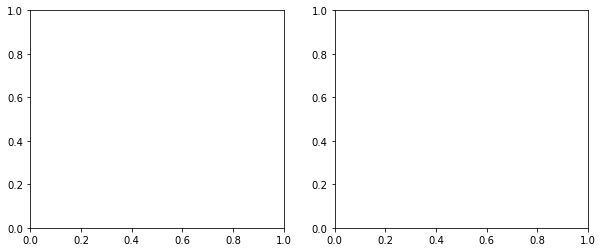

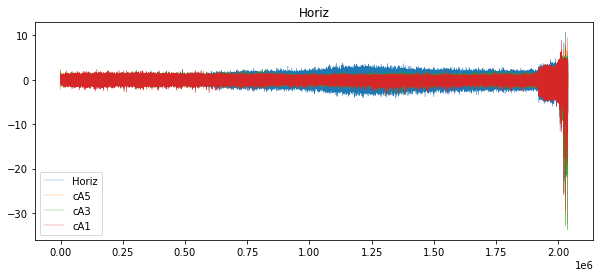

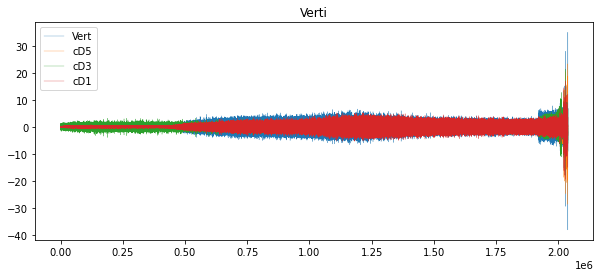

In [6]:
files = os.listdir(abspath+'/wavelet/')
for name in files[7:8]:
    data = pd.read_csv(abspath+'/wavelet/'+name)    
    
    plt.rcParams["figure.figsize"] = (10,4)
    fig, ax = plt.subplots(1, 2)
    ax[0] = data.plot(kind='line',y=['Horiz','cA5','cA3','cA1'],linewidth=0.3)
    ax[1] = data.plot(kind='line',y=['Vert','cD5','cD3','cD1'],linewidth=0.3)
    
    ax[0].set_title("Horiz")
    ax[1].set_title("Verti")
    
    #plt.tight_layout()
    plt.show()
    #plt.close()
    